# Full Dataset

## Setting Up Notebook and Preparing Data

In [31]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import sksurv
#from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
#from sklearn.compose import ColumnTransformer
from sksurv.util import Surv
from sklearn.preprocessing import StandardScaler
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt
%matplotlib inline
from time import sleep
from tqdm import tqdm

In [2]:
# Read in the csv file containing the training data
df_imported = pd.read_csv('data/cleaned_train_churn_kg.csv', header=0)
df_imported

,CETEL_NUMBER,CNI_CUSTOMER,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,TEC_ANT_VOICE,STATE_VOICE,CITY_VOICE,CHURN
0,56991715723,761130129,455,1,200,8395,0,0,0,2,0,0,7,2.5,10.0,93.0,2.5,10.0,93.0,False
1,56936225196,155259159,180,2,2500,13437,4,145,32,336,1,0,13,3.0,6.0,38.0,3.0,6.0,38.0,False
2,56989789214,143481697,480,1,2500,16798,0,20,4,2,0,0,3,3.0,5.0,313.0,3.0,4.0,342.0,False
3,56990739868,72526880,173,2,2500,16798,197,630,34,6,1,17,13,4.0,100.0,268.0,4.0,100.0,268.0,False
4,56993149265,160008989,317,1,2500,25202,109,66,95,0,0,1,7,4.0,5.0,156.0,4.0,5.0,156.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190769,56972771502,8257,42,2,1000,16798,10,1,1,0,0,3,2,4.0,7.0,316.0,4.0,7.0,316.0,False
190770,56978932387,8257,42,1,1000,13437,0,0,0,0,0,0,4,4.0,100.0,345.0,4.0,100.0,345.0,False
190771,56964225103,89130239,1777,2,400,13437,17,24,27,0,1,57,13,4.0,5.0,69.0,4.0,5.0,69.0,False
190772,56983215619,163106485,687,1,400,13437,244,77,156,0,0,3,7,4.0,6.0,27.0,4.0,6.0,274.0,False


In [3]:
df = df_imported.drop(['CNI_CUSTOMER', 'CETEL_NUMBER', 'TEC_ANT_VOICE', 'STATE_VOICE', 
                    'CITY_VOICE'], axis=1)

In [4]:
df[df['STATE_DATA'].isnull()]

,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,CHURN
28,463,2,250,13437,0,0,0,0,0,0,13,0.0,NaN,NaN,False
40,92,2,1000,8395,0,0,0,0,0,0,13,0.0,NaN,NaN,False
57,1379,1,500,13437,0,0,0,0,0,0,3,0.0,NaN,NaN,False
89,163,1,2500,21840,0,0,0,0,0,0,2,0.0,NaN,NaN,False
103,101,1,1000,13437,0,0,0,0,0,0,7,0.0,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190735,955,3,0,6714,0,0,0,0,0,0,9,0.0,NaN,NaN,False
190739,538,2,150,8395,0,0,0,0,0,0,13,0.0,NaN,NaN,False
190747,223,2,2500,21840,0,0,0,0,0,0,13,0.0,NaN,NaN,False
190752,717,2,200,8395,0,0,0,0,0,0,13,0.0,NaN,NaN,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190774 entries, 0 to 190773
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAYS_LIFE            190774 non-null  int64  
 1   DEVICE_TECHNOLOGY    190774 non-null  int64  
 2   MIN_PLAN             190774 non-null  int64  
 3   PRICE_PLAN           190774 non-null  int64  
 4   TOT_MIN_CALL_OUT     190774 non-null  int64  
 5   AVG_MIN_CALL_OUT_3   190774 non-null  int64  
 6   TOT_MIN_IN_ULT_MES   190774 non-null  int64  
 7   AVG_MIN_IN_3         190774 non-null  int64  
 8   ROA_LASTMONTH        190774 non-null  int64  
 9   ROACETEL_LAST_MONTH  190774 non-null  int64  
 10  DEVICE               190774 non-null  int64  
 11  TEC_ANT_DATA         190774 non-null  float64
 12  STATE_DATA           185153 non-null  float64
 13  CITY_DATA            185153 non-null  float64
 14  CHURN                190774 non-null  bool   
dtypes: bool(1), float

In [6]:
filled = df.fillna(9999)
filled

,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,CHURN
0,455,1,200,8395,0,0,0,2,0,0,7,2.5,10.0,93.0,False
1,180,2,2500,13437,4,145,32,336,1,0,13,3.0,6.0,38.0,False
2,480,1,2500,16798,0,20,4,2,0,0,3,3.0,5.0,313.0,False
3,173,2,2500,16798,197,630,34,6,1,17,13,4.0,100.0,268.0,False
4,317,1,2500,25202,109,66,95,0,0,1,7,4.0,5.0,156.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190769,42,2,1000,16798,10,1,1,0,0,3,2,4.0,7.0,316.0,False
190770,42,1,1000,13437,0,0,0,0,0,0,4,4.0,100.0,345.0,False
190771,1777,2,400,13437,17,24,27,0,1,57,13,4.0,5.0,69.0,False
190772,687,1,400,13437,244,77,156,0,0,3,7,4.0,6.0,27.0,False


In [7]:
filled.iloc[28]

DAYS_LIFE                463
DEVICE_TECHNOLOGY          2
MIN_PLAN                 250
PRICE_PLAN             13437
TOT_MIN_CALL_OUT           0
AVG_MIN_CALL_OUT_3         0
TOT_MIN_IN_ULT_MES         0
AVG_MIN_IN_3               0
ROA_LASTMONTH              0
ROACETEL_LAST_MONTH        0
DEVICE                    13
TEC_ANT_DATA               0
STATE_DATA              9999
CITY_DATA               9999
CHURN                  False
Name: 28, dtype: object

In [8]:
filled[filled['STATE_DATA'] == 9999]

,DAYS_LIFE,DEVICE_TECHNOLOGY,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,DEVICE,TEC_ANT_DATA,STATE_DATA,CITY_DATA,CHURN
28,463,2,250,13437,0,0,0,0,0,0,13,0.0,9999.0,9999.0,False
40,92,2,1000,8395,0,0,0,0,0,0,13,0.0,9999.0,9999.0,False
57,1379,1,500,13437,0,0,0,0,0,0,3,0.0,9999.0,9999.0,False
89,163,1,2500,21840,0,0,0,0,0,0,2,0.0,9999.0,9999.0,False
103,101,1,1000,13437,0,0,0,0,0,0,7,0.0,9999.0,9999.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190735,955,3,0,6714,0,0,0,0,0,0,9,0.0,9999.0,9999.0,False
190739,538,2,150,8395,0,0,0,0,0,0,13,0.0,9999.0,9999.0,False
190747,223,2,2500,21840,0,0,0,0,0,0,13,0.0,9999.0,9999.0,False
190752,717,2,200,8395,0,0,0,0,0,0,13,0.0,9999.0,9999.0,False


In [9]:
filled.isnull().sum()

DAYS_LIFE              0
DEVICE_TECHNOLOGY      0
MIN_PLAN               0
PRICE_PLAN             0
TOT_MIN_CALL_OUT       0
AVG_MIN_CALL_OUT_3     0
TOT_MIN_IN_ULT_MES     0
AVG_MIN_IN_3           0
ROA_LASTMONTH          0
ROACETEL_LAST_MONTH    0
DEVICE                 0
TEC_ANT_DATA           0
STATE_DATA             0
CITY_DATA              0
CHURN                  0
dtype: int64

In [10]:
df_dummies = pd.get_dummies(filled, columns=['DEVICE_TECHNOLOGY', 'TEC_ANT_DATA', 'STATE_DATA', 'CITY_DATA', 
                                             'DEVICE'])
df_dummies

,DAYS_LIFE,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,CHURN,...,DEVICE_8,DEVICE_9,DEVICE_10,DEVICE_11,DEVICE_12,DEVICE_13,DEVICE_14,DEVICE_15,DEVICE_16,DEVICE_17
0,455,200,8395,0,0,0,2,0,0,False,...,0,0,0,0,0,0,0,0,0,0
1,180,2500,13437,4,145,32,336,1,0,False,...,0,0,0,0,0,1,0,0,0,0
2,480,2500,16798,0,20,4,2,0,0,False,...,0,0,0,0,0,0,0,0,0,0
3,173,2500,16798,197,630,34,6,1,17,False,...,0,0,0,0,0,1,0,0,0,0
4,317,2500,25202,109,66,95,0,0,1,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190769,42,1000,16798,10,1,1,0,0,3,False,...,0,0,0,0,0,0,0,0,0,0
190770,42,1000,13437,0,0,0,0,0,0,False,...,0,0,0,0,0,0,0,0,0,0
190771,1777,400,13437,17,24,27,0,1,57,False,...,0,0,0,0,0,1,0,0,0,0
190772,687,400,13437,244,77,156,0,0,3,False,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_dummies.iloc[28]

DAYS_LIFE               463
MIN_PLAN                250
PRICE_PLAN            13437
TOT_MIN_CALL_OUT          0
AVG_MIN_CALL_OUT_3        0
                      ...  
DEVICE_13                 1
DEVICE_14                 0
DEVICE_15                 0
DEVICE_16                 0
DEVICE_17                 0
Name: 28, Length: 397, dtype: object

In [12]:
df_dummies['CITY_DATA_9999.0']

0         0
1         0
2         0
3         0
4         0
         ..
190769    0
190770    0
190771    0
190772    0
190773    0
Name: CITY_DATA_9999.0, Length: 190774, dtype: uint8

We need to find most common instance in each category and drop that one-hot-encoded column for baseline purposes.

In [13]:
df['DEVICE_TECHNOLOGY'].value_counts(ascending=False)

2     96410
1     78709
0      4151
21     3227
22     3103
4      2607
3      1872
23      368
30      211
24       91
25       25
Name: DEVICE_TECHNOLOGY, dtype: int64

In [14]:
df['DEVICE'].value_counts(ascending=False)

13    100227
3      35584
7      26084
2      14126
5       5030
6       3028
4       2868
1       1034
10       950
9        542
12       491
8        428
0        198
11        91
15        33
16        31
14        20
17         9
Name: DEVICE, dtype: int64

In [15]:
df['TEC_ANT_DATA'].value_counts(ascending=False)

4.0    151486
3.0     30743
0.0      7741
2.5       747
2.0        57
Name: TEC_ANT_DATA, dtype: int64

In [16]:
df['STATE_DATA'].value_counts(ascending=False)

 100.0    84975
 8.0      22218
 5.0      21873
 9.0       7738
 10.0      7647
 4.0       6759
 7.0       6186
 6.0       6152
 2.0       5944
 14.0      4085
 1.0       3328
 3.0       2829
 15.0      2195
-1.0       2020
 12.0       876
 11.0       328
Name: STATE_DATA, dtype: int64

In [17]:
df['CITY_DATA'].value_counts(ascending=False)

345.0    8899
135.0    6523
318.0    5766
288.0    4504
163.0    4500
         ... 
36.0        1
208.0       1
74.0        1
119.0       1
88.0        1
Name: CITY_DATA, Length: 335, dtype: int64

In [18]:
X = df_dummies.drop(['CHURN', 'DAYS_LIFE', 'DEVICE_TECHNOLOGY_2', 
                     'AVG_MIN_CALL_OUT_3','DEVICE_13',
                     'TEC_ANT_DATA_4.0', 'STATE_DATA_100.0', 'CITY_DATA_345.0'], axis=1)
X = X.astype(float)
y = Surv.from_dataframe('CHURN', 'DAYS_LIFE', df_dummies)

## Fitting the Model

In [19]:
estimator = CoxPHSurvivalAnalysis().fit(X, y)

/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=1.52355e-30): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=5.20362e-32): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=6.19328e-32): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=6.66572e-31): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:42

In [20]:
estimator.score(X, y)

0.6302567538011313

In [21]:
surv_funcs = estimator.predict_survival_function(X.iloc[:10])

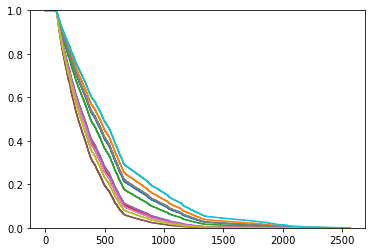

In [22]:
for fn in surv_funcs:
    plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()

Belos is a general Kaplan-Meier Survival Curve for the whole dataset--this should be the same even for the numerical-only dataset. That's because the Kaplan-Meier Survival Curve only takes into account a customer's tenure with the company and whether or not they have churned.

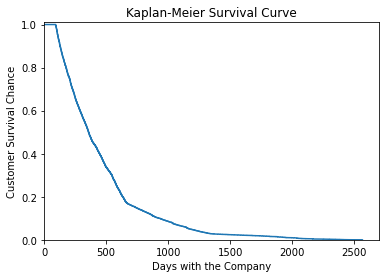

In [23]:
x_num, y_num = kaplan_meier_estimator(df.CHURN, df.DAYS_LIFE)
_ = plt.step(x_num, y_num, where="post")
_ = plt.xlim(0, 2700)
_ = plt.ylim(0, 1.01)
_ = plt.xlabel('Days with the Company')
_ = plt.ylabel('Customer Survival Chance')
_ = plt.title('Kaplan-Meier Survival Curve')
plt.savefig('Kaplan-Meier Survival Curve.png')
plt.show()

---

# Numerical-Only Dataset

## Preparing the Data

In [24]:
# Using the same 'df_imported' variable that is the csv file we read in earlier and have not since changed
df_num = df_imported.drop(['CNI_CUSTOMER', 'CETEL_NUMBER', 'TEC_ANT_VOICE', 'STATE_VOICE', 'DEVICE_TECHNOLOGY', 'DEVICE',
                       'TEC_ANT_DATA', 'STATE_DATA', 'CITY_DATA', 'CITY_VOICE'], axis=1)
df_num

,DAYS_LIFE,MIN_PLAN,PRICE_PLAN,TOT_MIN_CALL_OUT,AVG_MIN_CALL_OUT_3,TOT_MIN_IN_ULT_MES,AVG_MIN_IN_3,ROA_LASTMONTH,ROACETEL_LAST_MONTH,CHURN
0,455,200,8395,0,0,0,2,0,0,False
1,180,2500,13437,4,145,32,336,1,0,False
2,480,2500,16798,0,20,4,2,0,0,False
3,173,2500,16798,197,630,34,6,1,17,False
4,317,2500,25202,109,66,95,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...
190769,42,1000,16798,10,1,1,0,0,3,False
190770,42,1000,13437,0,0,0,0,0,0,False
190771,1777,400,13437,17,24,27,0,1,57,False
190772,687,400,13437,244,77,156,0,0,3,False


In [25]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190774 entries, 0 to 190773
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   DAYS_LIFE            190774 non-null  int64
 1   MIN_PLAN             190774 non-null  int64
 2   PRICE_PLAN           190774 non-null  int64
 3   TOT_MIN_CALL_OUT     190774 non-null  int64
 4   AVG_MIN_CALL_OUT_3   190774 non-null  int64
 5   TOT_MIN_IN_ULT_MES   190774 non-null  int64
 6   AVG_MIN_IN_3         190774 non-null  int64
 7   ROA_LASTMONTH        190774 non-null  int64
 8   ROACETEL_LAST_MONTH  190774 non-null  int64
 9   CHURN                190774 non-null  bool 
dtypes: bool(1), int64(9)
memory usage: 13.3 MB


In [26]:
df_num.isnull().sum()

DAYS_LIFE              0
MIN_PLAN               0
PRICE_PLAN             0
TOT_MIN_CALL_OUT       0
AVG_MIN_CALL_OUT_3     0
TOT_MIN_IN_ULT_MES     0
AVG_MIN_IN_3           0
ROA_LASTMONTH          0
ROACETEL_LAST_MONTH    0
CHURN                  0
dtype: int64

In [27]:
X_num = df_num.drop(['CHURN', 'DAYS_LIFE'], axis=1)
X_num = X_num.astype(float)
y_num = Surv.from_dataframe("CHURN", "DAYS_LIFE", df_num)

## Train-Test Split

In [28]:
rand_state=18

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, test_size=0.2, random_state=rand_state)

## Pipeline

In [32]:
pipeline = make_pipeline(StandardScaler(), CoxPHSurvivalAnalysis())

In [33]:
scores = cross_val_score(pipeline, X_num, y_num)
scores

array([0.59396666, 0.5855313 , 0.58519369, 0.58875421, 0.61048186])

In [34]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxphsurvivalanalysis', CoxPHSurvivalAnalysis())])

In [35]:
pipeline.score(X_test, y_test)

0.6005332401090533

In [36]:
y_pred = pipeline.predict(X_test)
y_pred

array([-0.00263179, -0.18780066,  0.65339556, ...,  0.0267835 ,
       -0.06623942, -0.3095331 ])

In [38]:
surv_funcs_num = pipeline.predict_survival_function(X_num.iloc[:10])

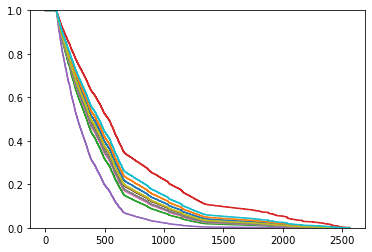

In [39]:
for fn in surv_funcs_num:
    plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()